In [114]:
%pip install folium pandas matplotlib seaborn geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [115]:
import pandas as pd

df = pd.read_csv('한국도로교통공단_시군구별 월별 교통사고 통계_20241231.csv', encoding='euc-kr')
df

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1,77,0,25,70,2
1,서울,종로구,2,56,0,13,57,6
2,서울,종로구,3,74,0,28,66,7
3,서울,종로구,4,84,0,23,84,3
4,서울,종로구,5,61,1,9,67,11
...,...,...,...,...,...,...,...,...
2735,세종,세종시,8,108,0,19,131,18
2736,세종,세종시,9,103,0,19,114,30
2737,세종,세종시,10,104,0,17,113,29
2738,세종,세종시,11,136,2,18,147,13


In [116]:
df['도시명'] = df['시도']+" " + df['시군구']
df

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수,도시명
0,서울,종로구,1,77,0,25,70,2,서울 종로구
1,서울,종로구,2,56,0,13,57,6,서울 종로구
2,서울,종로구,3,74,0,28,66,7,서울 종로구
3,서울,종로구,4,84,0,23,84,3,서울 종로구
4,서울,종로구,5,61,1,9,67,11,서울 종로구
...,...,...,...,...,...,...,...,...,...
2735,세종,세종시,8,108,0,19,131,18,세종 세종시
2736,세종,세종시,9,103,0,19,114,30,세종 세종시
2737,세종,세종시,10,104,0,17,113,29,세종 세종시
2738,세종,세종시,11,136,2,18,147,13,세종 세종시


In [117]:
import pandas as pd

tf = pd.read_csv('20250920213710_방문자 수 추이.csv')

tf = tf[tf['방문자 구분'] == '전체방문자(a+b)']
tf['발생월'] = tf['기준년월'].apply(lambda x: (int(x) - 202400))
tf

,기준년월,광역지자체,방문자 구분,방문자 수,발생월
1,202401,전국,전체방문자(a+b),9.927256e+08,1
4,202402,전국,전체방문자(a+b),9.416580e+08,2
7,202403,전국,전체방문자(a+b),1.051182e+09,3
10,202404,전국,전체방문자(a+b),9.755744e+08,4
13,202405,전국,전체방문자(a+b),1.034630e+09,5
16,202406,전국,전체방문자(a+b),9.915202e+08,6
19,202407,전국,전체방문자(a+b),1.013201e+09,7
22,202408,전국,전체방문자(a+b),1.016482e+09,8
25,202409,전국,전체방문자(a+b),1.006327e+09,9
28,202410,전국,전체방문자(a+b),1.047261e+09,10


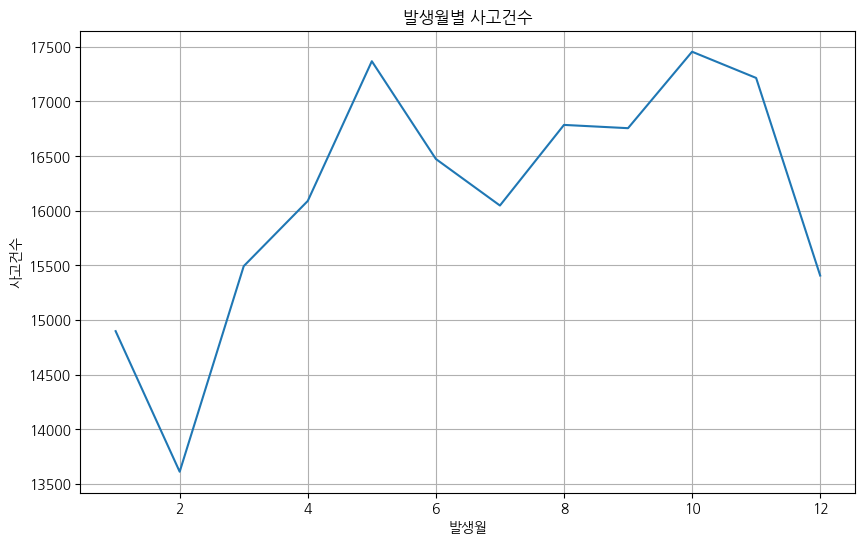

<Figure size 640x480 with 0 Axes>

In [153]:
# 발생월별 사망자수
import koreanize_matplotlib
import matplotlib.pyplot as plt

total_by_month = df.groupby('발생월')['사고건수'].sum()  # 발생월별 사망자수 합계 계산
total_by_month.sort_index(inplace=True)  # 발생월 기준 정렬
total_by_month

# 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(total_by_month.index, total_by_month)
plt.xlabel('발생월')
plt.ylabel('사고건수')
plt.title('발생월별 사고건수')
plt.grid(True)
plt.show()
plt.savefig('발생월별 사고건수.png')

In [119]:
df1=df[['발생월','사고건수']]
df1=df1.groupby('발생월').sum().reset_index()
df1

,발생월,사고건수
0,1,15129
1,2,13836
2,3,15738
3,4,16300
4,5,17605
5,6,16690
6,7,16252
7,8,17000
8,9,16956
9,10,17720


In [120]:
tf=pd.read_csv('20250920213710_방문자 수 추이.csv')
tf=tf[tf['방문자 구분']=='전체방문자(a+b)']
tf['발생월']=tf['기준년월'].apply(lambda x: x-202400)
tf

,기준년월,광역지자체,방문자 구분,방문자 수,발생월
1,202401,전국,전체방문자(a+b),9.927256e+08,1
4,202402,전국,전체방문자(a+b),9.416580e+08,2
7,202403,전국,전체방문자(a+b),1.051182e+09,3
10,202404,전국,전체방문자(a+b),9.755744e+08,4
13,202405,전국,전체방문자(a+b),1.034630e+09,5
16,202406,전국,전체방문자(a+b),9.915202e+08,6
19,202407,전국,전체방문자(a+b),1.013201e+09,7
22,202408,전국,전체방문자(a+b),1.016482e+09,8
25,202409,전국,전체방문자(a+b),1.006327e+09,9
28,202410,전국,전체방문자(a+b),1.047261e+09,10


In [121]:
rf=pd.merge(df1,tf,on='발생월',how='inner')[['발생월','사고건수','방문자 수']]
rf.set_index('발생월',inplace=True)
rf


,사고건수,방문자 수
발생월,,
1,15129,9.927256e+08
2,13836,9.416580e+08
3,15738,1.051182e+09
4,16300,9.755744e+08
5,17605,1.034630e+09
6,16690,9.915202e+08
7,16252,1.013201e+09
8,17000,1.016482e+09
9,16956,1.006327e+09


# 사고건수와 방문자수는 관계가 많다 여행은 교통사고에 영향을 준다

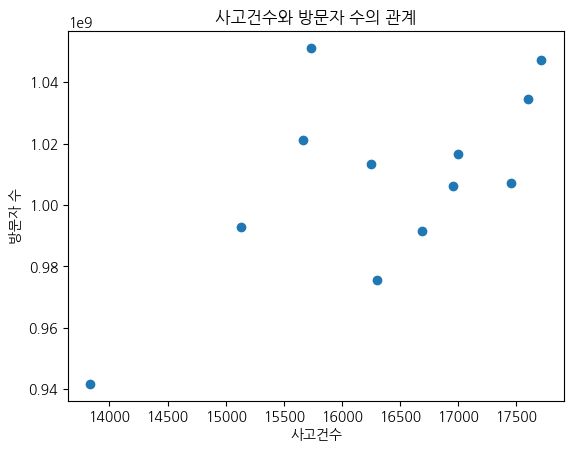

<Figure size 640x480 with 0 Axes>

In [154]:
plt.scatter(rf['사고건수'],rf['방문자 수'])
plt.title('사고건수와 방문자 수의 관계')
plt.xlabel('사고건수')
plt.ylabel('방문자 수')
plt.show()
plt.savefig('사고건수와 방문자 수의 관계.png')


In [123]:
rf.corr()

,사고건수,방문자 수
사고건수,1.000000,0.615242
방문자 수,0.615242,1.000000


In [129]:
city_list = list(df['도시명'].unique())
print(city_list)


['서울 종로구', '서울 중구', '서울 용산구', '서울 성동구', '서울 동대문구', '서울 성북구', '서울 도봉구', '서울 은평구', '서울 서대문구', '서울 마포구', '서울 강서구', '서울 구로구', '서울 영등포구', '서울 동작구', '서울 관악구', '서울 강남구', '서울 강동구', '서울 송파구', '서울 서초구', '서울 양천구', '서울 중랑구', '서울 노원구', '서울 광진구', '서울 강북구', '서울 금천구', '부산 중구', '부산 서구', '부산 동구', '부산 영도구', '부산 부산진구', '부산 동래구', '부산 남구', '부산 북구', '부산 해운대구', '부산 사하구', '부산 금정구', '부산 강서구', '부산 연제구', '부산 수영구', '부산 사상구', '부산 기장군', '경기 수원시', '경기 성남시', '경기 의정부시', '경기 안양시', '경기 부천시', '경기 안산시', '경기 평택시', '경기 광명시', '경기 구리시', '경기 양주시', '경기 여주시', '경기 화성시', '경기 시흥시', '경기 파주시', '경기 고양시', '경기 광주시', '경기 연천군', '경기 포천시', '경기 가평군', '경기 양평군', '경기 이천시', '경기 용인시', '경기 안성시', '경기 김포시', '경기 동두천시', '경기 과천시', '경기 군포시', '경기 남양주시', '경기 오산시', '경기 의왕시', '경기 하남시', '강원 춘천시', '강원 원주시', '강원 동해시', '강원 강릉시', '강원 속초시', '강원 태백시', '강원 삼척시', '강원 홍천군', '강원 횡성군', '강원 영월군', '강원 평창군', '강원 정선군', '강원 철원군', '강원 화천군', '강원 양구군', '강원 인제군', '강원 고성군', '강원 양양군', '충북 청주시', '충북 충주시', '충북 제천시', '충북 보은군', '충북 옥천군', '충북 영동군', '충북 진천군', '충북 괴산군', '충북 음성군', '충북 단양군

In [131]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim

def get_coordinates(주소):
    geolocator = Nominatim(user_agent="aaa")
    location = geolocator.geocode(주소)
    try:
        result= location.latitude, location.longitude
    except:
        result= None, None
    print(result)
    return result

city=pd.DataFrame(city_list, columns=['도시명'])
city['위도'], city['경도'] = zip(*city['도시명'].map(get_coordinates))
city

(37.5806949, 126.9827989)
(37.5636559, 126.9975097)
(37.5534363, 126.9697994)
(37.5635, 127.0365)
(37.5741982, 127.0395092)
(37.59, 127.0165)
(37.6686, 127.0466)
(37.6024, 126.9293)
(37.5790747, 126.9367861)
(37.566571, 126.9015317)
(37.5509, 126.8497)
(37.4951999, 126.8877)
(37.5262, 126.8959)
(37.5120999, 126.9395)
(37.4782, 126.9518)
(37.5177, 127.0473)
(37.53, 127.1237)
(37.5145, 127.1058)
(37.4835, 127.0322)
(37.5171, 126.8663)
(37.6063, 127.093)
(37.654, 127.0567)
(37.5384, 127.0828)
(37.6395, 127.0255)
(37.4565, 126.8954)
(35.106501, 129.0325814)
(35.0974999, 129.0241)
(35.1155532, 129.0425868)
(35.0908, 129.0678)
(35.1632335, 129.0529462)
(35.2052, 129.0837)
(35.1361, 129.0843999)
(35.1969, 128.9901999)
(35.1629, 129.1638)
(35.1041, 128.9751)
(35.2429, 129.0926)
(35.212, 128.9805)
(35.1765, 129.0793)
(35.1454, 129.1127)
(35.1521, 128.9911)
(35.2447818, 129.2215462)
(37.2633325, 127.0287472)
(37.3651229, 127.1054443)
(37.7442313, 127.0443128)
(37.3938528, 126.9570605)
(37.502125

,도시명,위도,경도
0,서울 종로구,37.580695,126.982799
1,서울 중구,37.563656,126.997510
2,서울 용산구,37.553436,126.969799
3,서울 성동구,37.563500,127.036500
4,서울 동대문구,37.574198,127.039509
...,...,...,...
224,울산 남구,35.498487,129.345936
225,울산 동구,35.504666,129.417011
226,울산 북구,35.582600,129.360400
227,울산 울주군,35.551314,129.137930


In [132]:
city.to_csv('city.csv', index=False)

In [137]:
df=pd.merge(df, city, on='도시명', how='left')[['도시명','위도','경도','사고건수','발생월']]
df

,도시명,위도,경도,사고건수,발생월
0,서울 종로구,37.580695,126.982799,77,1
1,서울 종로구,37.580695,126.982799,56,2
2,서울 종로구,37.580695,126.982799,74,3
3,서울 종로구,37.580695,126.982799,84,4
4,서울 종로구,37.580695,126.982799,61,5
...,...,...,...,...,...
2735,세종 세종시,36.588360,127.295139,108,8
2736,세종 세종시,36.588360,127.295139,103,9
2737,세종 세종시,36.588360,127.295139,104,10
2738,세종 세종시,36.588360,127.295139,136,11


In [141]:
df.dropna(inplace=True)
df

,도시명,위도,경도,사고건수,발생월
0,서울 종로구,37.580695,126.982799,77,1
1,서울 종로구,37.580695,126.982799,56,2
2,서울 종로구,37.580695,126.982799,74,3
3,서울 종로구,37.580695,126.982799,84,4
4,서울 종로구,37.580695,126.982799,61,5
...,...,...,...,...,...
2735,세종 세종시,36.588360,127.295139,108,8
2736,세종 세종시,36.588360,127.295139,103,9
2737,세종 세종시,36.588360,127.295139,104,10
2738,세종 세종시,36.588360,127.295139,136,11


In [151]:
import folium

# 위도와 경도의 최소값, 최대값을 찾아서 지도의 범위를 설정
min_lat = float(df['위도'].min())
max_lat = float(df['위도'].max())
min_lon = float(df['경도'].min())
max_lon = float(df['경도'].max())

# 지도 생성
m = folium.Map(location=[(min_lat + max_lat) / 2, (min_lon + max_lon) / 2], zoom_start=12)

# 위도와 경도를 이용해 지도에 마커 생성
for i in range(len(df)):
    lat = float(df.iloc[i]['위도'])
    lon = float(df.iloc[i]['경도'])
    count = int(df.iloc[i]['사고건수'])
    folium.Circle(
        [lat, lon],
        radius=20 * count,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# 지도 표시
m


In [152]:
m.save('map.html')